# 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
## 컬럼
- ID : 확진자 ID. 발생순서대로 1씩증가하는 값
- 확진일: 확진 날짜
- 자치구: 확진 결과를 받은 지역구.
- 여행력: 해외유입의 경우 국가명
- 접촉력: 감염된 경로. 
- 현재상태: 퇴원, 사망, NA: 치료중

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv', encoding='utf-8')
df.shape

(30061, 6)

# DataFrame 기본정보 조회

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30061 non-null  int64 
 1   확진일     30061 non-null  object
 2   자치구     30061 non-null  object
 3   여행력     976 non-null    object
 4   접촉력     30061 non-null  object
 5   현재상태    27143 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

ID          0
확진일         0
자치구         0
여행력     29085
접촉력         0
현재상태     2918
dtype: int64

In [10]:
df.head(20)

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN
5,30056,2021-03-14,서대문구,NaN,기타 확진자 접촉,NaN
6,30055,2021-03-14,서대문구,NaN,관악구 소재 미용업 관련,NaN
7,30054,2021-03-14,은평구,NaN,영등포구 소재 직장 관련,NaN
8,30053,2021-03-14,광진구,NaN,병원 및 요양시설,NaN
9,30052,2021-03-14,강동구,NaN,감염경로 조사중,NaN


In [9]:
df.tail(10)

,ID,확진일,자치구,여행력,접촉력,현재상태
30051,10,2020-02-05,송파구,NaN,종로구 집단발병,퇴원
30052,9,2020-02-05,타시도,싱가폴,해외유입,퇴원
30053,8,2020-02-02,종로구,중국,해외유입,퇴원
30054,7,2020-01-31,종로구,NaN,종로구 집단발병,퇴원
30055,6,2020-01-31,성북구,NaN,종로구 집단발병,퇴원
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원
30060,1,2020-01-24,강서구,중국,해외유입,퇴원


##  범주형 컬럼들의 고유값들 조회

In [11]:
df['자치구'].unique()

array(['동대문구', '강동구', '타시도', '마포구', '서대문구', '은평구', '광진구', '용산구', '노원구',
       '동작구', '구로구', '관악구', '기타', '서초구', '영등포구', '양천구', '강남구', '송파구',
       '종로구', '중구', '강서구', '도봉구', '성북구', '강북구', '중랑구', '성동구', '금천구'],
      dtype=object)

In [12]:
df['여행력'].unique()

array([nan, '폴란드', '미국', '파키스탄', '베트남 사이공', '카자흐스탄', '인도', '인도네시아',
       '나이지리아', '러시아', '체코', '바레인', '과테말라', '아제르바이잔', '아제르바히잔', '프랑스',
       '오스트리아', '이집트', '적도기니', '헝가리', '세네갈', '불가리아,터키', '미국LA', '필리핀',
       'UAE', '레바논', '덴마크', '벨라루스', '네팔', '일본', '모로코', '콜롬비아', '가나', '영국',
       '터키', '에티오피나', '탄자니아', '요르단', '이탈리아', '멕시코', '리투아니아', '에티오피아',
       '독일', '모리타니아', '루마니아', '기타', '시에라리온', '캐나다', '벨기에', '파라과이', '중국',
       '스페인', '이라크', '우즈베키스탄', '콩고민주공화국', '아이티공화국', '아랍에미리트', '스리랑카',
       '에콰도르', '캄보디아', '싱가포르', '르완다', '코트디부아르', '미얀마', '콩고', '우크라이나',
       '스웨덴', '브라질', '방글라데시', '시리아', '두바이', '호주', '몰타', '남아공', '알제리',
       '알바니아', '핀란드', '네덜란드', '아르헨티나', '가봉', '사우디아라비아', '쿠웨이트', '크로아티아',
       '28238', '케냐', '수단', '튀니지', '에디오피아', '키르기스스탄', '이란', '우간다', '카타르',
       '키르기즈스탄', '멕시코, 미국', '21263', '베트남', '홍콩', '모로코, 터키', '미국, 멕시코',
       '페루', '아일랜드', '아프리카', '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '오세아니아',
       '호주, 인도네시아', '포르투갈', '유럽', '미국, 캐나다, 멕시코', '미국, 브라질', '태국', '아시아',
   

In [13]:
df['접촉력'].unique()

array(["동대문구 소재 병원 관련(\\'21.2.)", '감염경로 조사중', '관악구 소재 미용업 관련',
       '타시도 확진자 접촉', '기타 확진자 접촉', '영등포구 소재 직장 관련', '병원 및 요양시설',
       '도봉구 소재 아동시설 관련', '영등포구 소재 음식점 관련', '성동구 소재 직장, 종교시설 관련',
       "송파구 소재 병원(\\'21.3.) 관련", '도봉구 소재 어린이집 관련(`21.3.)',
       '강동구 소재 고등학교 관련', '광진구 소재 가족, 어린이집 관련', '강서구 소재 회사 관련',
       '구로구 소재 의료기관 관련', "종로구 소재 요양시설 관련(\\'21.3.)", '은평구 소재 학원 관련',
       '동대문구 소재 요양병원 관련', '성동구 소재 종교시설 관련', '노원구 소재 음식점 관련', '해외유입',
       '은평구 소재 직장 관련', '영등포구 소재 사우나 관련', "강동구 소재 한방병원 관련(\\'21.3월)",
       '수도권 지인모임 관련(`21.3월)', "영등포구 소재 의료기관 관련(\\'21.2월)",
       '동대문구 가족/어린이집 관련', '성동구 소재 직장 관련(`21.3-Ⅱ)', '은평구 소재 아동시설 관련',
       '동대문구 소재 아동시설관련', '강북구 소재 제조업공장 관련', '노원구 소재 어린이집 관련(`21.2월)',
       '타시도 축산물공판장 관련', '중구 지인모임 관련', "수도권 지인모임 관련(\\'21.3월(2))",
       '중구 소재 직장 관련(`21.3.)', '광진구 가족모임 관련', '동대문구 소재 아동시설 관련',
       '서대문구 소재 직장 관련', '역조실 일보 반영', "송파구 소재 요양병원 관련(\\'21.2월)",
       '서초구 소재 직장 관련', '종로구 소재 산후조리원 관련', '관악구 지인, 직장 관련',
       '송파구 소재 실내체육시설 관련', 

In [14]:
df['현재상태'].unique()

array(['사망', nan, '퇴원'], dtype=object)

# 확진일 확진자수 정보 조회

## 확진일의 빈도수

In [16]:
df['확진일'].value_counts()

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-05-17      1
2020-04-24      1
2020-04-18      1
2020-02-02      1
2020-05-01      1
Name: 확진일, Length: 384, dtype: int64

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

## 확진일을 datetime으로 변환

In [21]:
df['확진일'] = pd.to_datetime(df['확진일'])#, format='%Y-%m-%d') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


## 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [92]:
df['확진일'].dt.isocalendar()#.groupby(['year','week'])['year'].count()

,year,week,day
0,2021,10,7
1,2021,10,7
2,2021,10,7
3,2021,10,7
4,2021,10,7
...,...,...,...
30056,2020,5,5
30057,2020,5,4
30058,2020,5,4
30059,2020,5,4


In [93]:
tmp = df['확진일'].dt.isocalendar()
# df['년'] = df['확진일'].dt.year
df['년'] = tmp['year']
df['월'] = df['확진일'].dt.month
df['주'] = tmp['week']#df['확진일'].dt.week
df['요일'] = tmp['day'] #df['확진일'].dt.dayofweek

In [94]:
df.groupby(['년','주'])['ID'].count()

년     주 
2020  4        1
      5        7
      6        4
      7        2
      8       17
      9       61
      10      38
      11     124
      12      76
      13     105
      14     129
      15      47
      16      15
      17       3
      18       8
      19      52
      20      47
      21      39
      22      88
      23     134
      24     125
      25     105
      26      78
      27      67
      28      57
      29      48
      30      97
      31      38
      32      76
      33     394
      34     912
      35     921
      36     459
      37     341
      38     280
      39     237
      40     164
      41     170
      42     139
      43     127
      44     250
      45     291
      46     432
      47     820
      48    1182
      49    1627
      50    1977
      51    2655
      52    2696
      53    2401
2021  1     1456
      2     1002
      3      844
      4      809
      5     1010
      6     1044
      7     1149
      8      848
     

In [31]:
df.head(2)

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,6
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,6


## 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week 로 조회시 - 월요일: 0, 일요일: 6
    - dt.isocalendar()['week']로 조회시 - 월요일 : 1, 일요일: 7

In [95]:
def change_week_str(x):
    if x == 1:
        return '월'
    elif x == 2:
        return '화'
    elif x == 3:
        return '수'
    elif x == 4:
        return '목'
    elif x == 5:
        return '금'
    elif x == 6:
        return '토'
    elif x == 7:
        return '일'

In [96]:
df['요일'] = df['요일'].apply(change_week_str)

In [97]:
df.head()

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일


###  Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 메모리를 절약 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 논리적 순서로 정렬되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.Categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순성형 여부 설정

## 요일을 Categorical Type으로 변환

In [39]:
list("월화수목금토일")

['월', '화', '수', '목', '금', '토', '일']

In [99]:
df['요일'] = pd.Categorical(df['요일'], categories=list("월화수목금토일"))
df

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
 6   년       30061 non-null  int64         
 7   월       30061 non-null  int64         
 8   주       30061 non-null  int64         
 9   요일      30061 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 2.1+ MB


## 확진자 수 변화 추이 시각화

In [50]:
일자별_확진자수 = df['확진일'].value_counts()
일자별_확진자수

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-05-17      1
2020-04-18      1
2020-04-15      1
2020-05-01      1
2020-03-05      1
Name: 확진일, Length: 384, dtype: int64

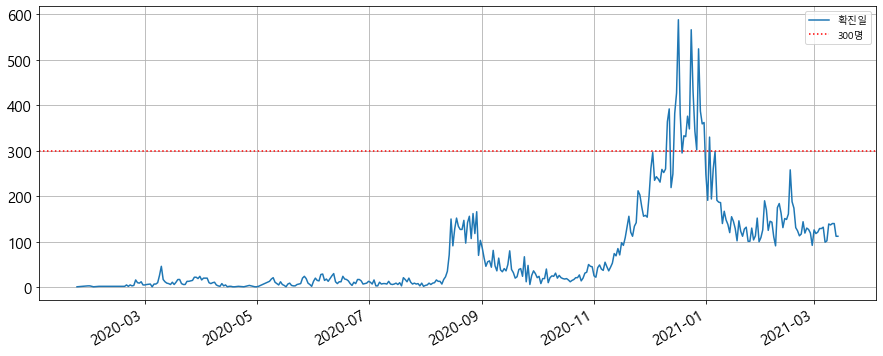

In [56]:
일자별_확진자수.plot(kind='line', figsize=(15,6))

plt.axhline(300, color='red', linestyle=':', label='300명')
plt.grid(True)
plt.legend()
plt.show()

## 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

In [60]:
일자별확진자수_12월이후 = df.loc[df['확진일']>='2020-12-01', '확진일'].value_counts()
일자별확진자수_12월이후 

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2021-01-24    101
2021-01-30    100
2021-03-07     99
2021-02-28     92
2021-02-08     91
Name: 확진일, Length: 104, dtype: int64

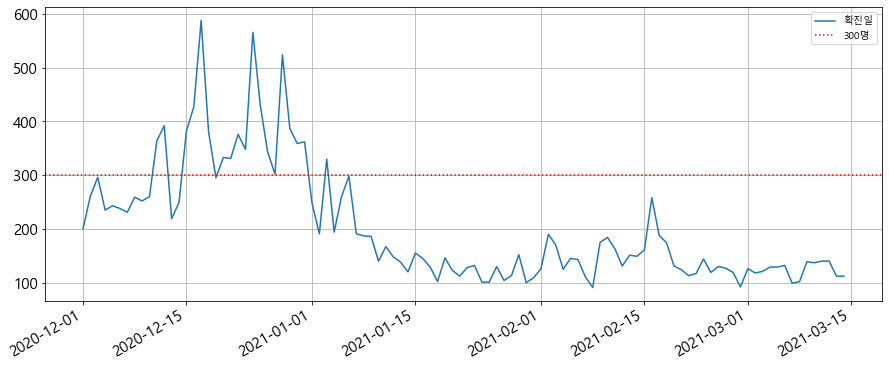

In [61]:
일자별확진자수_12월이후.plot(kind='line', figsize=(15,6))
plt.axhline(300, color='red', linestyle=':', label='300명')
plt.legend()
plt.grid(True)
plt.show()

## 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

In [63]:
년도_주_별_확진자수 = df.groupby(['년','주'])['ID'].count()
년도_주_별_확진자수

년     주 
2020  4        1
      5        7
      6        4
      7        2
      8       17
            ... 
2021  7     1149
      8      848
      9      854
      10     882
      53     769
Name: ID, Length: 61, dtype: int64

In [76]:
[f'{year}년 {week}주차'  for i, (year, week) in enumerate(년도_주_별_확진자수.index) if i % 10==0]

['2020년 4주차',
 '2020년 14주차',
 '2020년 24주차',
 '2020년 34주차',
 '2020년 44주차',
 '2021년 1주차',
 '2021년 53주차']

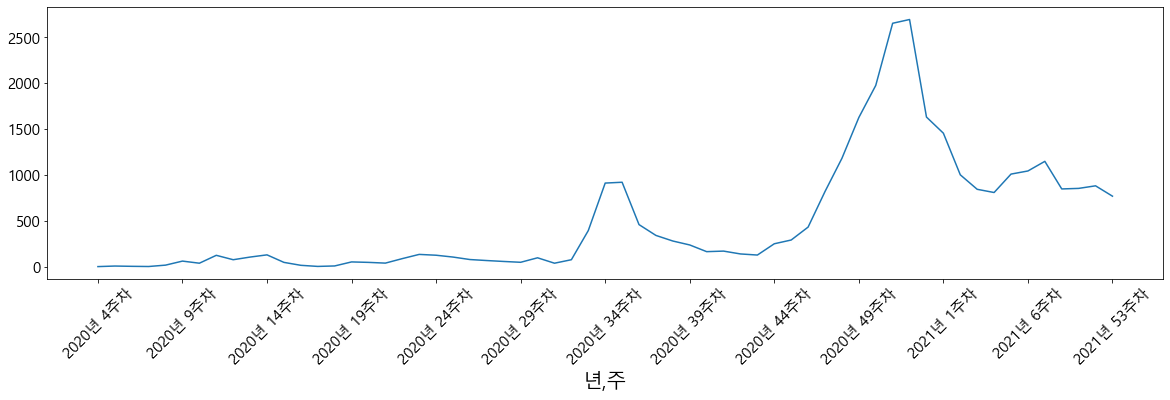

In [79]:
년도_주_별_확진자수.plot(figsize=(20,5))

plt.xticks(ticks=range(0, 년도_주_별_확진자수.size, 5), 
           labels=[f'{year}년 {week}주차'  for i, (year, week) in enumerate(년도_주_별_확진자수.index) if i%5==0],
           rotation=45)

plt.show()

## 년-월 단위  확진자수 조회 및 시각화

In [80]:
년_월별_확진자수 = df.groupby(['년','월'])['ID'].count()
년_월별_확진자수

년     월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10433
2021  1      4880
      2      4051
      3      1736
Name: ID, dtype: int64

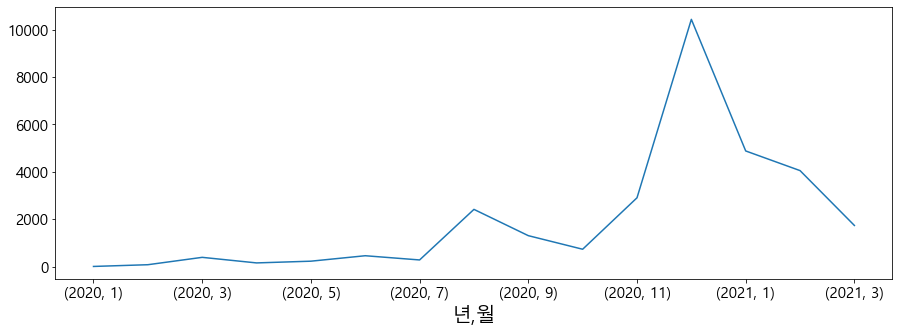

In [81]:
년_월별_확진자수.plot(kind='line', figsize=(15,5))
plt.show()

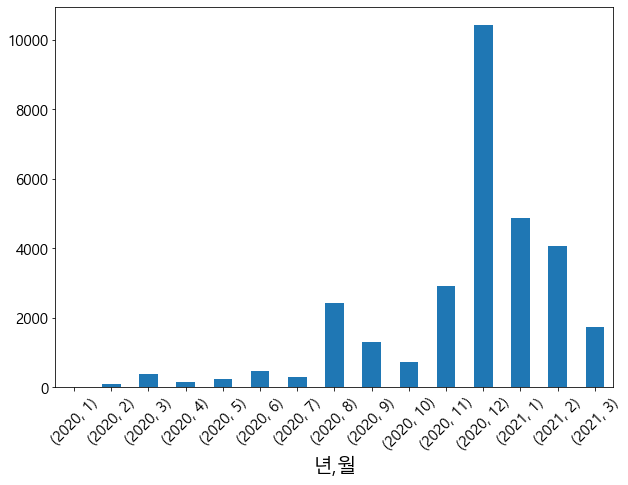

In [82]:
년_월별_확진자수.plot(kind='bar', figsize=(10,7), rot=45)

plt.show()

## 월-요일별 확진자수 조회 및 시각화

In [85]:
월_요일별_확진자수_2020 = df[df['년']==2020].groupby(['월', '요일'])['ID'].count()
월_요일별_확진자수_2020

월   요일
1   월        0
    화        0
    수        0
    목        3
    금        4
          ... 
12  수     1647
    목     2072
    금     1410
    토     1273
    일     1092
Name: ID, Length: 84, dtype: int64

In [86]:
월_요일별_확진자수_2021 = df[df['년']==2021].groupby(['월', '요일'])['ID'].count()
월_요일별_확진자수_2021

월  요일
1  월     564
   화     684
   수     663
   목     536
   금     870
   토     754
   일     809
2  월     495
   화     767
   수     661
   목     592
   금     534
   토     537
   일     465
3  월     228
   화     257
   수     258
   목     269
   금     269
   토     244
   일     211
Name: ID, dtype: int64

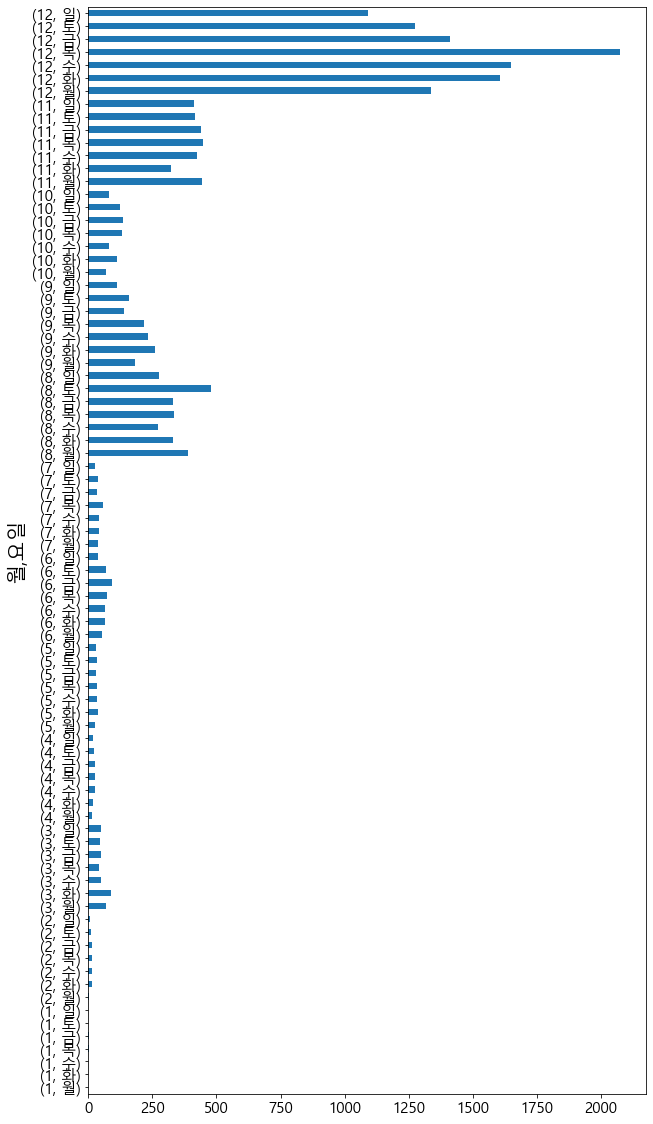

In [89]:
월_요일별_확진자수_2020.plot(kind='barh', figsize=(10,20))
plt.show()

In [111]:
월_요일별_확진자수2 = df[df['년']==2020].pivot_table(values='ID',
                                                   index='월',
                                                   columns='요일',
                                                   aggfunc='count',
                                                   fill_value=0)
월_요일별_확진자수2

요일,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,252,191,330
2,4,16,14,16,14,10,6
3,68,89,48,44,48,45,49
4,15,17,28,28,26,23,19
5,26,37,33,34,32,36,31
6,55,65,66,74,92,69,38
7,38,42,42,57,34,40,28
8,389,331,273,334,332,480,276
9,182,261,235,216,138,160,114


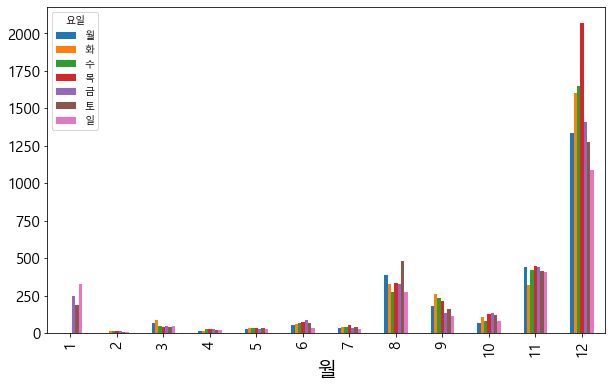

In [101]:
월_요일별_확진자수2.plot(kind='bar', figsize=(10,6))
plt.show()

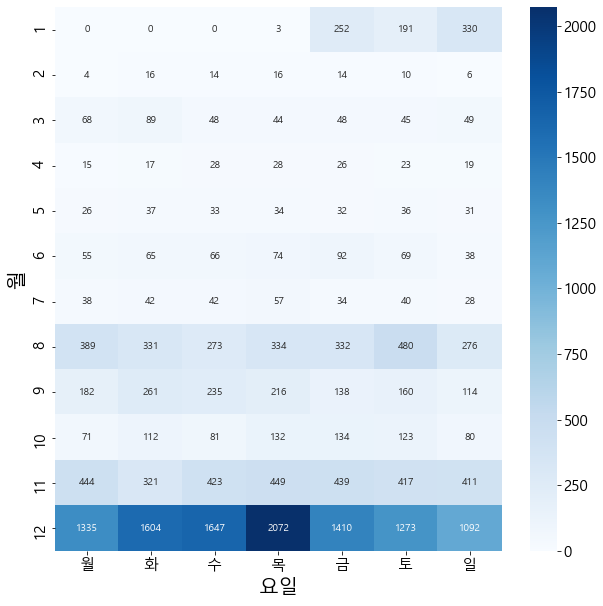

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(월_요일별_확진자수2, cmap='Blues', annot=True, fmt='d')  
plt.show()

# 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 일별 누적 확진자수 조회

In [115]:
a = pd.Series([1,2,3,4,5])
a.cumsum()

0     1
1     3
2     6
3    10
4    15
dtype: int64

In [119]:
a.to_frame()

,0
0,1
1,2
2,3
3,4
4,5


In [125]:
cumsum_df = df['확진일'].value_counts().sort_index().cumsum().to_frame()
cumsum_df

2020-01-24        1
2020-01-30        4
2020-01-31        7
2020-02-02        8
2020-02-05       10
              ...  
2021-03-10    29557
2021-03-11    29697
2021-03-12    29837
2021-03-13    29949
2021-03-14    30061
Name: 확진일, Length: 384, dtype: int64

In [126]:
cumsum_df.columns = ['누적확진자수']
cumsum_df

,누적확진자수
2020-01-24,1
2020-01-30,4
2020-01-31,7
2020-02-02,8
2020-02-05,10
...,...
2021-03-10,29557
2021-03-11,29697
2021-03-12,29837
2021-03-13,29949


## 확진자수 파생변수 생성

In [128]:
cumsum_df['확진자수'] = df['확진일'].value_counts().sort_index()
cumsum_df.head()

,누적확진자수,확진자수
2020-01-24,1,1
2020-01-30,4,3
2020-01-31,7,3
2020-02-02,8,1
2020-02-05,10,2


## 누적 확진자수 선그래프

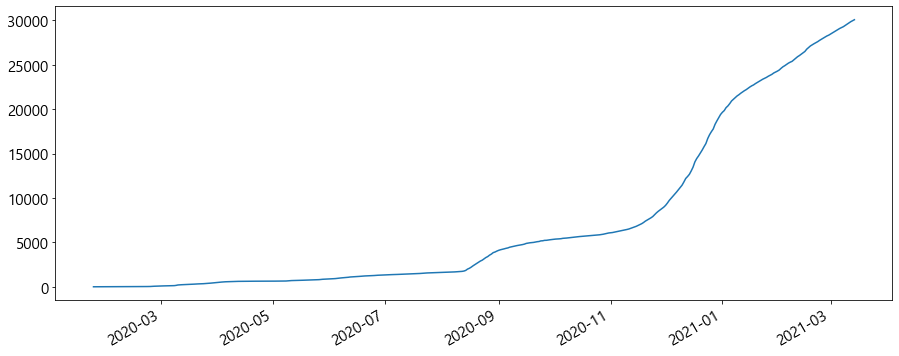

In [129]:
cumsum_df['누적확진자수'].plot(kind='line', figsize=(15,6))
plt.show()

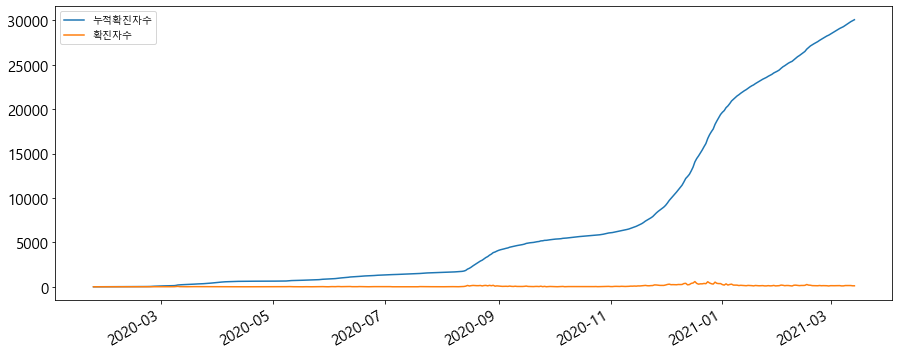

In [130]:
cumsum_df.plot(kind='line', figsize=(15,6))
plt.show()

# 자치구 기준 확진자 조회

## 자치구별 확진자수 조회

In [132]:
자치구별_확진자수 = df['자치구'].value_counts()
자치구별_확진자수 

기타      2000
강서구     1704
송파구     1658
타시도     1413
관악구     1408
강남구     1376
노원구     1322
성북구     1298
은평구     1262
중랑구     1250
동작구     1238
서초구     1148
양천구     1144
영등포구    1122
구로구     1094
동대문구    1087
강동구     1036
마포구      990
도봉구      954
광진구      876
용산구      815
서대문구     786
강북구      785
성동구      763
종로구      579
금천구      478
중구       475
Name: 자치구, dtype: int64

## 자치구별 확진자수 시각화

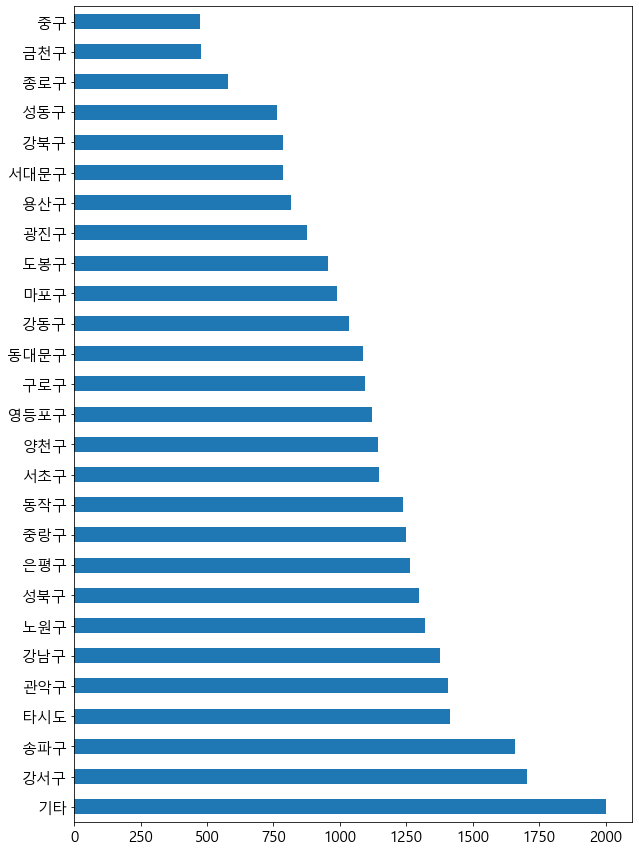

In [133]:
자치구별_확진자수.plot(kind='barh', figsize=(10,15))
plt.show()

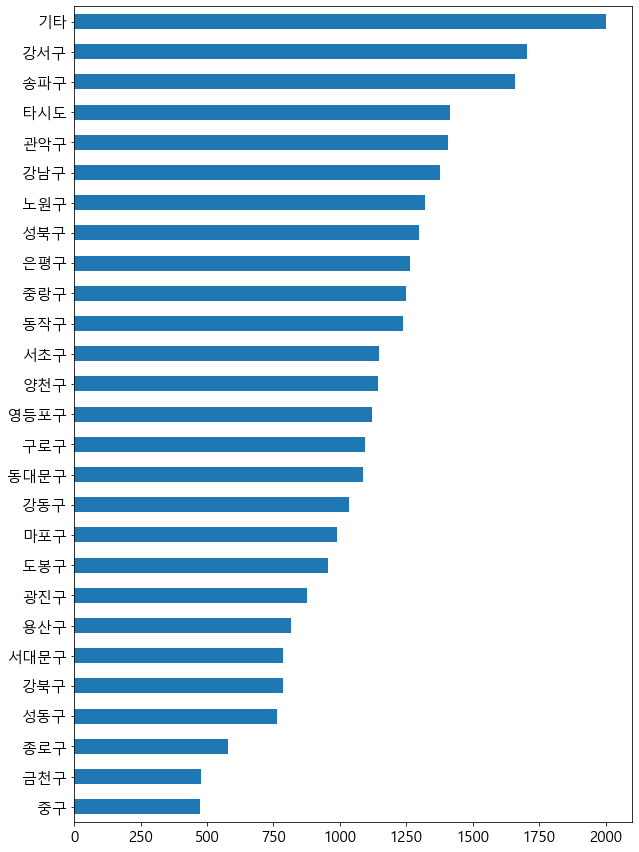

In [134]:
자치구별_확진자수.sort_values().plot(kind='barh', figsize=(10,15))
plt.show()

# 접촉력 관련 확진자 조회

## 가장 많은 집단 감염자를 낸 접촉력 상위 15개 조회

In [137]:
df['접촉력'].value_counts().head(15)

기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 접촉력, dtype: int64

## 가장 많은 집단 감염자를 낸 접촉력 하위 15 

In [138]:
df['접촉력'].value_counts().sort_values().head(15)

중구 소재 콜센터(다은컨설팅)            1
타시도 확진자 접촉 (강원 강릉시 지인모임)    1
삼성물산                        1
안양 목회자 관련                   1
신 천 지                       1
관악구 김혜근의원                   1
타시도 확진자 접촉 (수원 베이비시터 관련)    1
종로구 서울대병원                   1
ㅋㅋ트랜드                       1
서초구 LG 유플러스                 1
구로구소재 고등학교 관련               1
서초구소재 종교시설 관련               1
중랑구 서울의료원                   1
남부교도소 관련                    1
역조실 일보 반영                   1
Name: 접촉력, dtype: int64

## 접촉력 상위 15개만 시각화

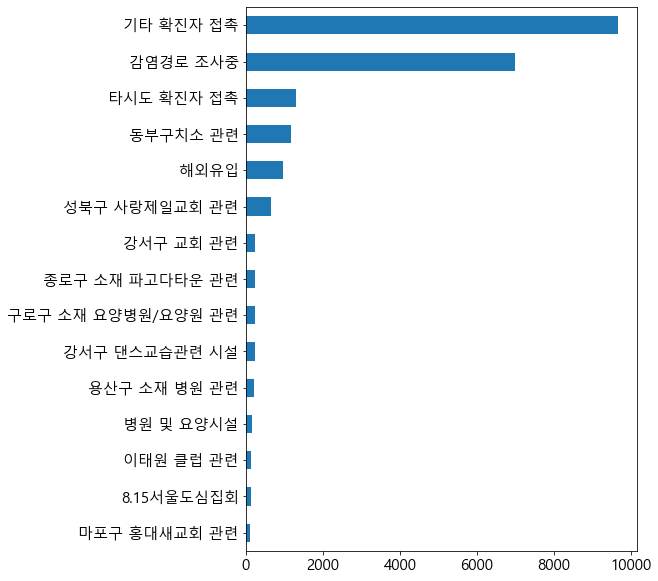

In [144]:
df['접촉력'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(7,10))
plt.show()

## 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

In [146]:
idx = df['접촉력'].value_counts().head(15).index
idx

Index(['기타 확진자 접촉', '감염경로 조사중', '타시도 확진자 접촉', '동부구치소 관련', '해외유입',
       '성북구 사랑제일교회 관련', '강서구 교회 관련', '종로구 소재 파고다타운 관련', '구로구 소재 요양병원/요양원 관련',
       '강서구 댄스교습관련 시설', '용산구 소재 병원 관련', '병원 및 요양시설', '이태원 클럽 관련', '8.15서울도심집회',
       '마포구 홍대새교회 관련'],
      dtype='object')

In [149]:
df.loc[df['접촉력'].isin(idx)].pivot_table(values='ID',
                                          index='접촉력',
                                          columns='월',
                                          aggfunc='count',
                                          fill_value=0)

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930
마포구 홍대새교회 관련,0,0,0,0,0,0,0,0,0,0,96,13
병원 및 요양시설,57,82,31,0,0,0,0,0,0,0,0,0


# 현재상태 관련조회

## 사망자 수/비율 조회

In [152]:
(df['현재상태']=='사망').sum()

405

In [156]:
(df['현재상태']=='사망').mean()

0.013472605701739795

In [154]:
df['현재상태'].value_counts()['사망']

405

In [157]:
df['현재상태'].value_counts()['퇴원']

26738

In [158]:
(df['현재상태']=='퇴원').sum()

26738

In [159]:
(df['현재상태']=='퇴원').mean()

0.8894581018595522

## 퇴원, 사망자, 치료중(NA)의 비율을 시각화

In [164]:
df['현재상태'].value_counts(dropna=False)

퇴원     26738
NaN     2918
사망       405
Name: 현재상태, dtype: int64

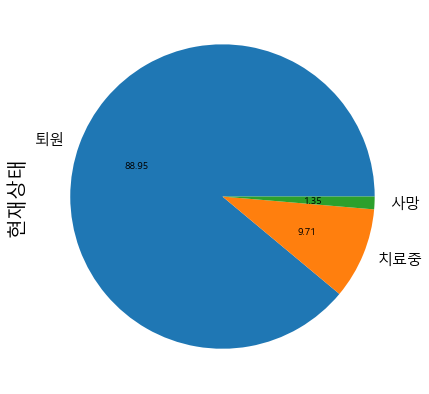

In [169]:
df['현재상태'].fillna('치료중').value_counts().plot(kind='pie', autopct='%.2f', figsize=(7,7))
plt.show()